In [17]:
import os
import sys
# CaLRepo = os.environ.get("CaLRepo")
CaLRepo = '/home/zyq0416/workspace/CaL'
# print(CaLRepo)
sys.path.append(f"{CaLRepo}/utilities/")

import numpy as np
import pandas as pd
import proplot as pplot
import CoolProp.CoolProp as CP
import matplotlib.pyplot as plt
import json
import math

from Cp0massWrapper import Cp0mass_Wrapper
from pyCostEstimator import Cost_Estimator
from pyDehydrator import Dehydrator
from pyBrayton import Brayton
from pyHydrator import Hydrator
from scipy.interpolate import make_interp_spline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


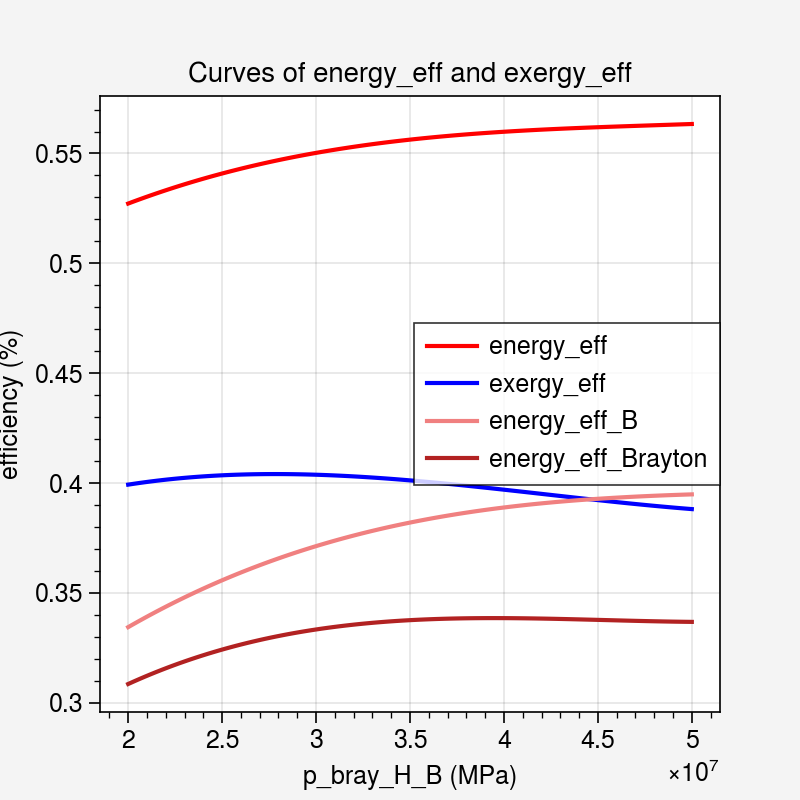

In [15]:
parameters = dict()
flue_gas_composistion = dict()
flue_gas_composistion["co2"] = 0.1338
flue_gas_composistion["o2"] = 0.0384
flue_gas_composistion["n2"] = 0.6975
parameters["flue_gas_composition"] = flue_gas_composistion
parameters["cao_conversion"] = 1  #氧化钙转化率
parameters["dehydrator_eff"] = 0.95   #脱水器效率
parameters["T_amb"] = 20   #环境温度
parameters["P_amb"] = 101325   #环境压力
parameters["T_dehy"] = 525     #脱水器温度
parameters["T_hydr"] = 465     #水合器温度
parameters["P_hydr"] = 101325
parameters["deltaTmin_SSHX"] = 25   #固-固换热器最小温差
parameters["deltaTmin_SGHX"] = 20   #固-气换热器最小温差
parameters["Store_electrical_power"] = 1e6
parameters["steam_pressure_loss_ratio"] = 0.01
parameters["isentropic_eff_mc"] = 0.88
parameters["t_isentropic_eff_mc"] = 0.92
parameters["mechanical_eff"] = 0.98   #机械效率
parameters["min_temperature_exchange"] = 15 
parameters["industrial_waste_heat_t"] =300 #℃
parameters["heat_transfer_loss_eff"] = 0.96
parameters["t_reaction"] = 525
parameters["p_bray_H"] = 19447839.26865841
parameters["p_bray_M"] = 12827110.4341202
parameters["p_bray_L"] = 7.5e6
parameters["t_reaction_B"] = 465
#parameters["p_bray_H_B"] = 22000000
#parameters["p_bray_M_B"] = 13740885
parameters["p_bray_L_B"] = 7.5e6
parameters["p_amb"] = 101325

parameters["mcmechanical_eff"] = 0.98
parameters["convey_consumption"] = 10e3/100
parameters["storage_dehydrator_distance"] = 100

p_bray_H_values = [20e6, 30e6, 40e6,50e6]
p_bray_M_values = [13e6, 16e6, 19e6,22e6]
colors = ['red', 'yellow', 'green','blue']  
labels = ['p_bray_H = 20 MPa', 'p_bray_H = 30 MPa', 'p_bray_H = 40 MPa','p_bray_H = 50 MPa'] 
a_values = []  # Empty list to store values of 'a'
b_values = []  # Empty list to store values of 'b'
c_values = []  # Empty list to store values of 'a'
d_values = []  # Empty list to store values of 'a'
for i, (p_bray_H, p_bray_M) in enumerate(zip(p_bray_H_values, p_bray_M_values)):
    # Set the p_bray_H value in parameters dictionary
    parameters["p_bray_H_B"] = p_bray_H
    parameters["p_bray_M_B"] = p_bray_M

    calre = Hydrator(parameters)
    T_X = 1
    results = calre.solve(T_X)
    a=results["Case_All"]["energy_eff"]
    b=results["Case_All"]["exergy_eff"]
    c=results["Case_B"]["energy_eff"]
    d=results["Brayton"]["evaluation_indicators"]["Energy efficiency"]
    a_values.append(a)
    b_values.append(b)
    c_values.append(c)
    d_values.append(d)

# Increasing data points density
x_values = np.linspace(min(p_bray_H_values), max(p_bray_H_values), 100)

# Applying spline interpolation
spl_a = make_interp_spline(p_bray_H_values, a_values)
spl_b = make_interp_spline(p_bray_H_values, b_values)
spl_c = make_interp_spline(p_bray_H_values, c_values)
spl_d = make_interp_spline(p_bray_H_values, d_values)
a_smooth = spl_a(x_values)
b_smooth = spl_b(x_values)
c_smooth = spl_c(x_values)
d_smooth = spl_d(x_values)

# Plotting the curves
plt.plot(x_values, a_smooth, color='red', label='energy_eff')
plt.plot(x_values, b_smooth, color='blue', label='exergy_eff')
plt.plot(x_values, c_smooth, color='lightcoral', label='energy_eff_B')
plt.plot(x_values, d_smooth, color='firebrick', label='energy_eff_Brayton')
plt.xlabel('p_bray_H_B (MPa)')
plt.ylabel('efficiency (%)')
plt.legend()
plt.title('Curves of energy_eff and exergy_eff')
plt.show()



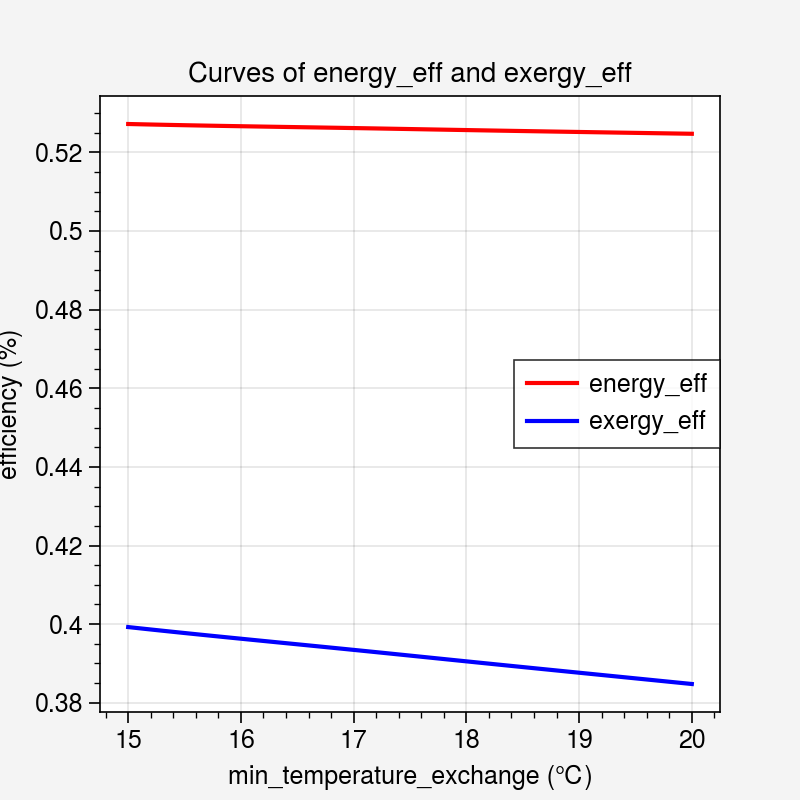

In [22]:
parameters = dict()
flue_gas_composistion = dict()
flue_gas_composistion["co2"] = 0.1338
flue_gas_composistion["o2"] = 0.0384
flue_gas_composistion["n2"] = 0.6975
parameters["flue_gas_composition"] = flue_gas_composistion
parameters["cao_conversion"] = 1  #氧化钙转化率
parameters["dehydrator_eff"] = 0.95   #脱水器效率
parameters["T_amb"] = 20   #环境温度
parameters["P_amb"] = 101325   #环境压力
parameters["T_dehy"] = 525     #脱水器温度
parameters["T_hydr"] = 465     #水合器温度
parameters["P_hydr"] = 101325
parameters["deltaTmin_SSHX"] = 25   #固-固换热器最小温差
parameters["deltaTmin_SGHX"] = 20   #固-气换热器最小温差
parameters["Store_electrical_power"] = 1e6
parameters["steam_pressure_loss_ratio"] = 0.01
parameters["isentropic_eff_mc"] = 0.88
parameters["t_isentropic_eff_mc"] = 0.92
parameters["mechanical_eff"] = 0.98   #机械效率
#parameters["min_temperature_exchange"] = 15 
parameters["industrial_waste_heat_t"] =300 #℃
parameters["heat_transfer_loss_eff"] = 0.96
parameters["t_reaction"] = 525
parameters["p_bray_H"] = 19447839.26865841
parameters["p_bray_M"] = 12827110.4341202
parameters["p_bray_L"] = 7.5e6
parameters["t_reaction_B"] = 465
parameters["p_bray_H_B"] = 20000000
parameters["p_bray_M_B"] = 13740885
parameters["p_bray_L_B"] = 7.5e6
parameters["p_amb"] = 101325

parameters["mcmechanical_eff"] = 0.98
parameters["convey_consumption"] = 10e3/100
parameters["storage_dehydrator_distance"] = 100

min_temperature_exchange_values = [15,16,17,18,19,20]
#p_bray_M_values = [13e6, 16e6, 19e6,22e6]
a_values = []  # Empty list to store values of 'a'
b_values = []  # Empty list to store values of 'b'
#c_values = []  # Empty list to store values of 'a'
#d_values = []  # Empty list to store values of 'a'
for i, min_temperature_exchange in enumerate(min_temperature_exchange_values):
    # Set the p_bray_H value in parameters dictionary
    parameters["min_temperature_exchange"] = min_temperature_exchange

    calre = Hydrator(parameters)
    T_X = 1
    results = calre.solve(T_X)
    a=results["Case_All"]["energy_eff"]
    b=results["Case_All"]["exergy_eff"]
#    c=results["Case_B"]["energy_eff"]
#    d=results["Brayton"]["evaluation_indicators"]["Energy efficiency"]
    a_values.append(a)
    b_values.append(b)
#    c_values.append(c)
#    d_values.append(d)

# Increasing data points density
x_values = np.linspace(min(min_temperature_exchange_values), max(min_temperature_exchange_values), 100)

# Applying spline interpolation
spl_a = make_interp_spline(min_temperature_exchange_values, a_values)
spl_b = make_interp_spline(min_temperature_exchange_values, b_values)
#spl_c = make_interp_spline(p_bray_H_values, c_values)
#spl_d = make_interp_spline(p_bray_H_values, d_values)
a_smooth = spl_a(x_values)
b_smooth = spl_b(x_values)
#c_smooth = spl_c(x_values)
#d_smooth = spl_d(x_values)

# Plotting the curves
plt.plot(x_values, a_smooth, color='red', label='energy_eff')
plt.plot(x_values, b_smooth, color='blue', label='exergy_eff')
#plt.plot(x_values, c_smooth, color='lightcoral', label='energy_eff_B')
#plt.plot(x_values, d_smooth, color='firebrick', label='energy_eff_Brayton')
plt.xlabel('min_temperature_exchange (℃)')
plt.ylabel('efficiency (%)')
plt.legend()
plt.title('Curves of energy_eff and exergy_eff')
plt.show()

